In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Load the dataset
file_path = r"C:\Users\KAISER\Desktop\INTERNSHIP\Traffic_data.csv"
data = pd.read_csv(file_path)

In [76]:
# Display data info
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
Time                 2976 non-null object
Date                 2976 non-null int64
Day of the week      2976 non-null object
CarCount             2976 non-null int64
BikeCount            2976 non-null int64
BusCount             2976 non-null int64
TruckCount           2976 non-null int64
Total                2976 non-null int64
Traffic Situation    2976 non-null object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB
None


In [77]:
print("\nData Description:")
print(data.describe())


Data Description:
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.218414  
std      60.190627  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000  


In [85]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                Date  CarCount  BikeCount  BusCount  TruckCount     Total
Date        1.000000 -0.013453  -0.005089 -0.015536    0.024734 -0.010679
CarCount   -0.013453  1.000000   0.722539  0.692994   -0.628157  0.970443
BikeCount  -0.005089  0.722539   1.000000  0.566364   -0.575399  0.797429
BusCount   -0.015536  0.692994   0.566364  1.000000   -0.546931  0.790705
TruckCount  0.024734 -0.628157  -0.575399 -0.546931    1.000000 -0.555471
Total      -0.010679  0.970443   0.797429  0.790705   -0.555471  1.000000


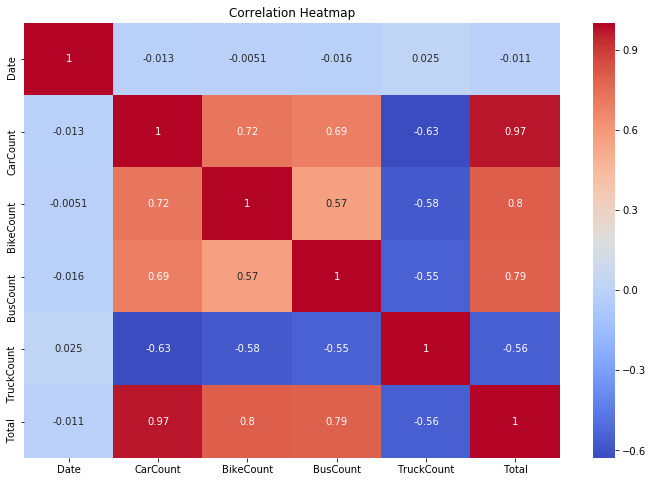

In [86]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# Task 2: Handling Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [68]:
# Fill missing values in numeric columns with the mean
numeric_cols = data.select_dtypes(include=[float, int])
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

In [69]:
# Optionally, fill missing values in non-numeric columns if necessary
non_numeric_cols = data.select_dtypes(exclude=[float, int])
data[non_numeric_cols.columns] = non_numeric_cols.fillna('Unknown')

In [70]:
# Task 3: Linear Regression
# Using vehicle count features to predict total traffic
features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
target = 'Total'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 6.422068980087834e-28
R2 Score: 1.0


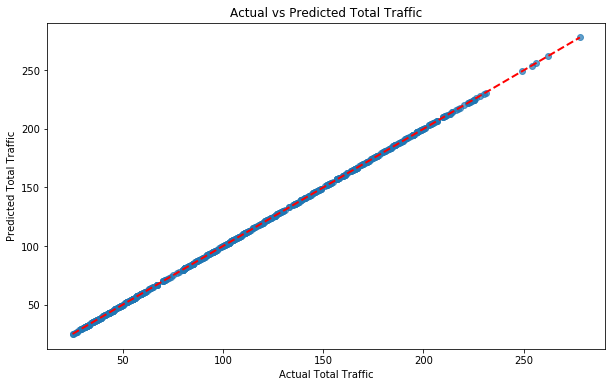

In [72]:
# Task 5: Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Traffic')
plt.ylabel('Predicted Total Traffic')
plt.title('Actual vs Predicted Total Traffic')
plt.show()